# KNN

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import auc, \
                            confusion_matrix, \
                            classification_report, \
                            precision_score, \
                            roc_curve, \
                            roc_auc_score, \
                            precision_recall_curve, \
                            average_precision_score, \
                            accuracy_score


# from sklearn import neighbors

from sklearn.utils.multiclass import unique_labels  ## lav bana  , array es talis , 
                                                    ## set a anum u veradardznuma ordered list from the set

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, \
                                    KFold, \
                                    cross_val_score

In [2]:
data_default = pd.read_excel("Default.xlsx",usecols = [1,2,3,4])
data_default.head(5)

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [3]:
data_default_dummies = pd.get_dummies(data_default, drop_first = True)
print(data_default_dummies.head(5))
np.unique(data_default_dummies.default_Yes, return_counts = True)

       balance        income  default_Yes  student_Yes
0   729.526495  44361.625074            0            0
1   817.180407  12106.134700            0            1
2  1073.549164  31767.138947            0            0
3   529.250605  35704.493935            0            0
4   785.655883  38463.495879            0            0


(array([0, 1], dtype=uint8), array([9667,  333], dtype=int64))

In [4]:
# data_default_dummies.boxplot("balance","student_Yes", figsize = (12,5))
# plt.show()

In [5]:
# plt.figure(figsize = (12,5))
# sns.boxplot(y = "balance", x = "student_Yes", data = data_default_dummies)
# plt.show()

In [7]:
# plt.figure(figsize = (12,5))
# sns.boxplot(y = "balance", x = "default_Yes", data = data_default_dummies)
# plt.show()

In [8]:
# sns.lmplot(y = "income", x = "balance", data = data_default_dummies, 
#            hue = 'default_Yes',fit_reg=False, scatter_kws = {'s':12}, aspect = 2)
# plt.show()

In [9]:
X = data_default_dummies.drop("default_Yes", axis = 1)
y = data_default_dummies.default_Yes.values

# y = y.values
knn7 = KNeighborsClassifier(7)
mod_knn7 = knn7.fit(X,y)

print(mod_knn7)
print(mod_knn7.score(X,y))

# pred = mod_knn7.predict(X)
# pred_prob = mod_knn7.predict_proba(X)
# actual = y
# print(pred_prob)
# np.unique(pred, return_counts = True)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')
0.9729


In [10]:
pred = mod_knn7.predict(X)
pred_prob = mod_knn7.predict_proba(X)

In [16]:
actual = y
print(pred_prob)
np.unique(pred, return_counts = True)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


(array([0, 1], dtype=uint8), array([9904,   96], dtype=int64))

In [25]:
# def plot_confusion_matrix(y_true, y_pred, classes,
#                           normalize=False,
#                           title=None,
#                           cmap=plt.cm.Blues):
#     """
#     This function prints and plots the confusion matrix.
#     Normalization can be applied by setting `normalize=True`.
#     """
#     if not title:
#         if normalize:
#             title = 'Normalized confusion matrix'
#         else:
#             title = 'Confusion matrix, without normalization'

#     # Compute confusion matrix
#     cm = confusion_matrix(y_true, y_pred)
#     # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

#     fig, ax = plt.subplots()
#     im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
#     ax.figure.colorbar(im, ax=ax)
#     # We want to show all ticks...
#     ax.set(xticks=np.arange(cm.shape[1]),
#            yticks=np.arange(cm.shape[0]),
#            # ... and label them with the respective list entries
#            xticklabels=classes, yticklabels=classes,
#            title=title,
#            ylabel='True label',
#            xlabel='Predicted label')

#     # Rotate the tick labels and set their alignment.
#     plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#              rotation_mode="anchor")

#     # Loop over data dimensions and create text annotations.
#     fmt = '.2f' if normalize else 'd'
#     thresh = cm.max() / 2.
#     for i in range(cm.shape[0]):
#         for j in range(cm.shape[1]):
#             ax.text(j, i, format(cm[i, j], fmt),
#                     ha="center", va="center",
#                     color="white" if cm[i, j] > thresh else "black")
#     fig.tight_layout()
#     return ax

In [19]:
tn, fp, fn, tp = confusion_matrix(y_true = actual, y_pred = pred, labels = np.array([0,1])).ravel()
print(tn, fp, fn, tp)

9650 17 254 79


In [24]:
# plot_confusion_matrix(y_true = actual, y_pred = pred, classes = np.array([0,1]))
# plt.show()

In [26]:
print(classification_report(actual, pred, digits = 6))

              precision    recall  f1-score   support

           0   0.974354  0.998241  0.986153      9667
           1   0.822917  0.237237  0.368298       333

   micro avg   0.972900  0.972900  0.972900     10000
   macro avg   0.898635  0.617739  0.677226     10000
weighted avg   0.969311  0.972900  0.965578     10000



In [27]:
fpr, tpr, thresholds = roc_curve(y_true = actual, y_score = pred_prob[:,0], pos_label = 0)
print(auc(fpr,tpr))

0.9765559497637701


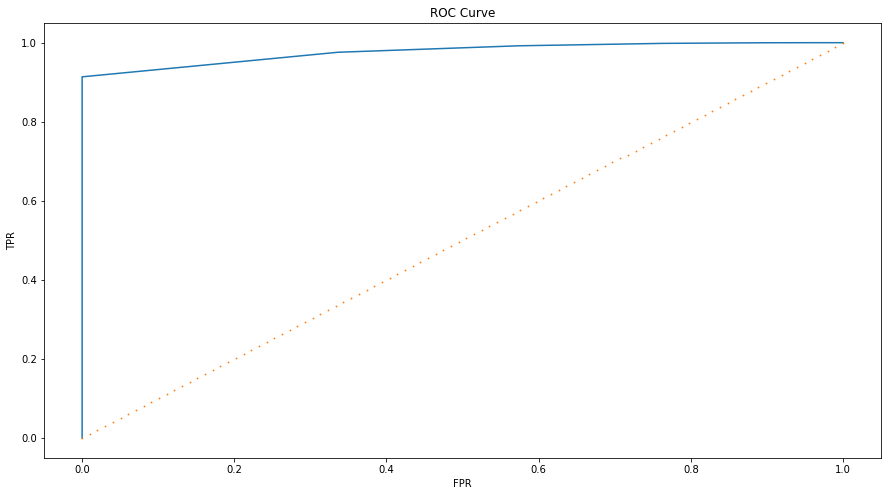

In [29]:
x= np.linspace(0,1,100)
plt.figure(figsize = (15,8)) 
plt.plot(fpr, tpr) 
plt.plot(x,x,".", markersize = 1.6) 
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [30]:
precision, recall, thresholds = precision_recall_curve(y_true = actual, probas_pred = pred_prob[:,1], pos_label = 1)
print(auc(recall,precision))  # petk gone 0.5-ic mec lini vor taneli lini

0.6246343277775797


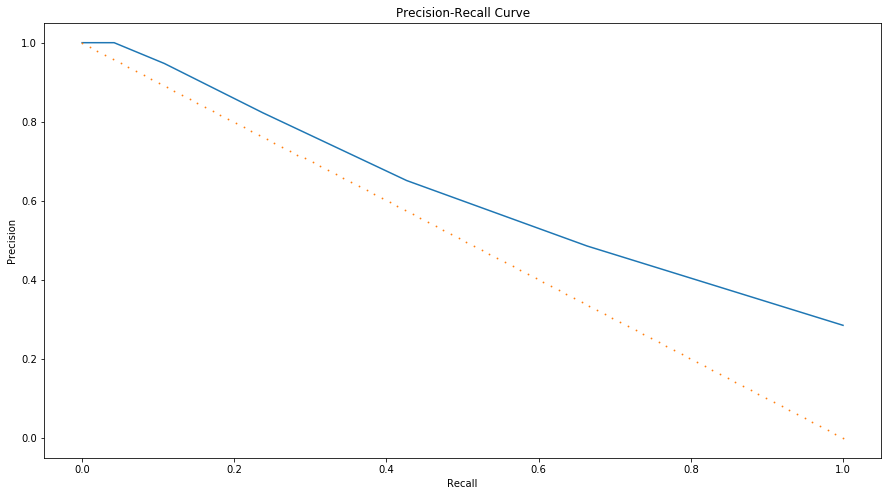

In [31]:
x= np.linspace(0,1,100)
plt.figure(figsize = (15,8)) 
plt.plot(recall, precision) 
plt.plot(x,-x+1,".", markersize = 1.6) 
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [32]:
average_precision_score(y_true = actual, y_score = pred_prob[:,1])

0.5452467105053292

In [36]:
X_Train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 4)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_Train, y_train)

y_predicted = knn.predict(X_test)

print(accuracy_score(y_test,y_predicted))
print(classification_report(y_test, y_predicted, digits = 4))

0.958
              precision    recall  f1-score   support

           0     0.9743    0.9824    0.9783      1931
           1     0.3585    0.2754    0.3115        69

   micro avg     0.9580    0.9580    0.9580      2000
   macro avg     0.6664    0.6289    0.6449      2000
weighted avg     0.9531    0.9580    0.9553      2000



In [38]:
k = np.arange(1,25)
k_result = []
for val in k:
    knn = KNeighborsClassifier(n_neighbors=val)
    knn.fit(X_Train,y_train)
    y_predict = knn.predict(X_test)
    k_result.append(accuracy_score(y_test,y_predict))

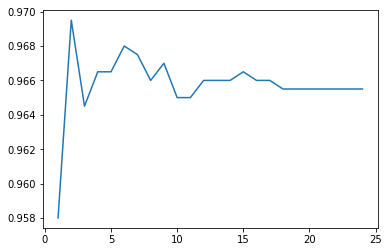

In [39]:
plt.plot(k,k_result)
plt.show()

In [43]:
k = np.arange(1,25)
k_result = []
for val in k:
    knn = KNeighborsClassifier(n_neighbors=val)
    kfold = KFold(n_splits=10)
    score = cross_val_score(knn,X_Train,y_train, cv = kfold, scoring = "accuracy")
    k_result.append(score)

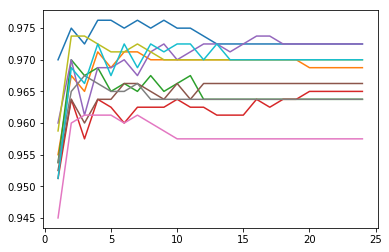

In [44]:
plt.plot(k,k_result)
plt.show()

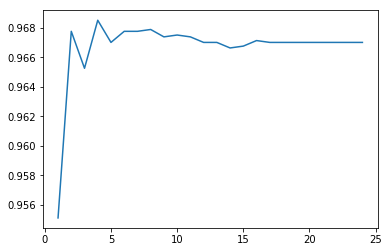

In [45]:
plt.plot(k,np.mean(np.array(k_result), axis = 1))
plt.show()

In [46]:
k_refresh = np.mean(np.array(k_result), axis = 1)
ind = np.argmax(k_refresh)
ind

3

In [47]:
knn_optimal = KNeighborsClassifier(n_neighbors = ind)
knn_optimal.fit(X,y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [48]:
y_pred = knn_optimal.predict(X)

In [49]:
print(classification_report(y, y_pred, digits = 6))

              precision    recall  f1-score   support

           0   0.981455  0.996379  0.988861      9667
           1   0.811828  0.453453  0.581888       333

   micro avg   0.978300  0.978300  0.978300     10000
   macro avg   0.896642  0.724916  0.785375     10000
weighted avg   0.975806  0.978300  0.975309     10000

